In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [5]:
daily_counts = pd.read_csv('../data/daily_counts_illegal_dumping_hp.csv')

In [6]:
prophet_df = pd.DataFrame()
prophet_df['ds'] = daily_counts.date
prophet_df['y'] = daily_counts.freq

In [7]:
prophet_df.head()

,ds,y
0,2016-01-11,2
1,2016-01-12,5
2,2016-01-13,4
3,2016-01-14,1
4,2016-01-15,1


In [8]:
m = Prophet()
m.fit(prophet_df)

14:36:10 - cmdstanpy - INFO - Chain [1] start processing
14:36:10 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future  = m.make_future_dataframe(periods=12 * 5, freq='ME')

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
2884,2030-04-30,5.085302,0.921158,9.388810,3.138709,1.186218,5.053199
2885,2030-05-31,3.186972,-1.090707,7.433136,3.134053,1.134345,5.102761
2886,2030-06-30,0.024560,-4.370349,4.362468,3.129547,1.065726,5.157598
2887,2030-07-31,5.877386,1.737491,10.338257,3.124891,0.986519,5.238212
2888,2030-08-31,1.042104,-3.225495,5.543414,3.120235,0.911042,5.301301


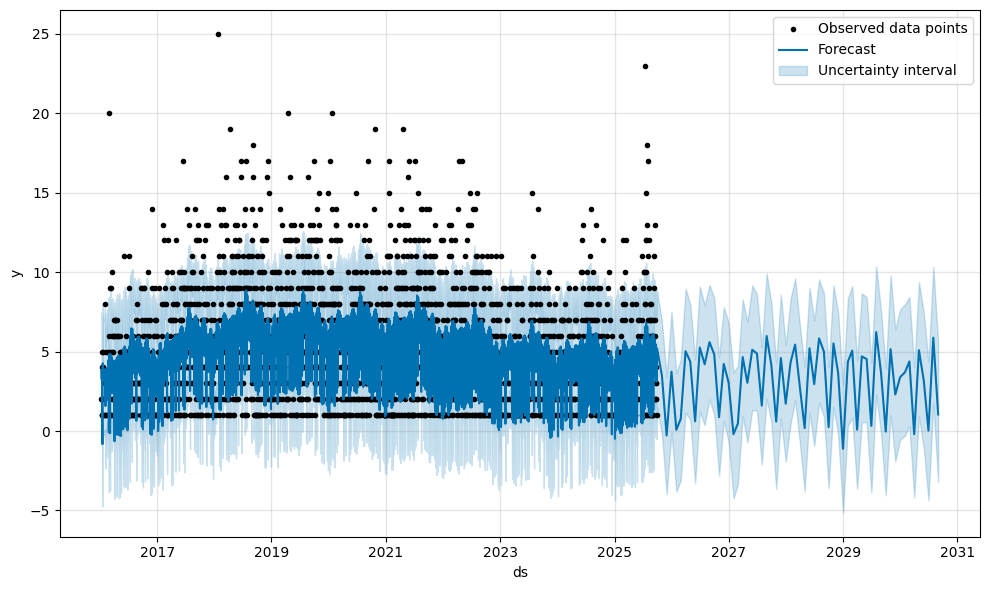

In [11]:
fig1 = m.plot(forecast, include_legend=True)

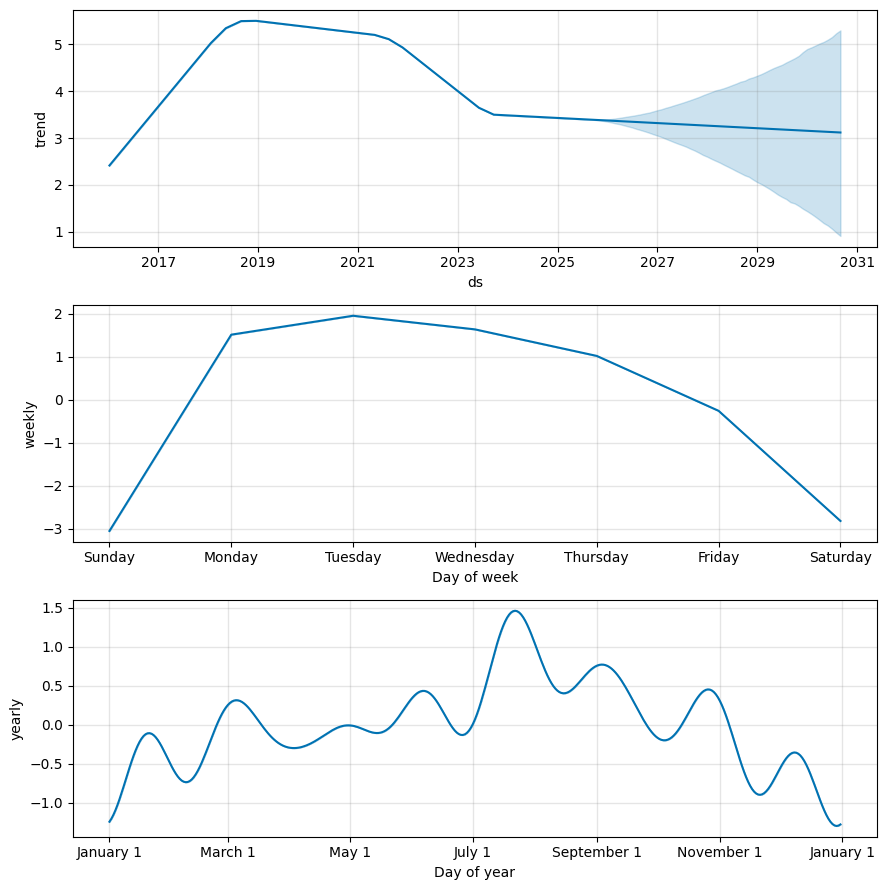

In [12]:
fig2 = m.plot_components(forecast)

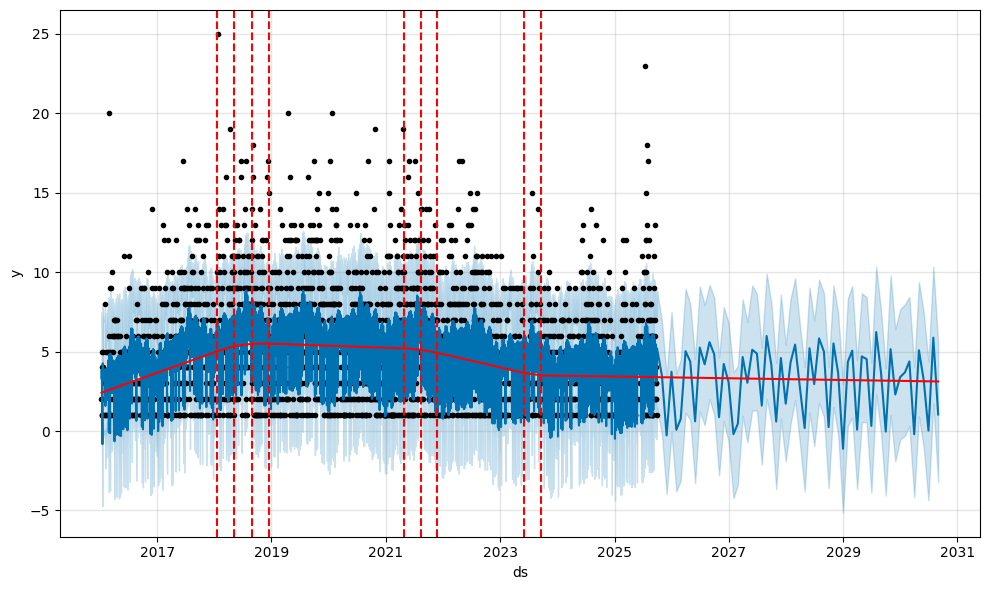

In [13]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),
                             m, forecast)